In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("Clusterdata.csv")
df.dropna(inplace = True)
df.head()

,SUBWAY_STA,Borough,Sector,AREACODE,Segment,Station,Line,morning_peak_volume,afternoon_peak_volume,EARLY_MORNING_RIDER,...,MORNING_PEAK_TRANSFER_RATIO,AFTERNOON_PEAK_TRANSFER_RATIO,morning_time1,afternoon_time1,MORNING_DURATION,AFTERNOON_DURATION,MONRING_DUMMY,EARLY_MORNING_TRANSFER_RATIO,MIDDAY_TRANSFER_RATIO,Total_riders
0,229,Manhattan,Midtown,1,Manhattan CBD Transfer,"Times Sq-42 St (N,Q,R,S,W,1,2,3,7)/42 St (A,C,E)",Manhattan CBD Transfer,13732.0,29277.0,2749.382716,...,0.010224,0.012609,8.1,17.4,1.0,1.5,1,0.012353,0.022143,173260
1,231,Manhattan,Midtown,1,Manhattan CBD Transfer,"Grand Central-42 St (S,4,5,6,7)",Manhattan CBD Transfer,11416.0,24838.0,1227.848101,...,0.008602,0.011354,7.9,17.0,1.0,1.0,1,0.020918,0.018186,143035
2,228,Manhattan,Midtown,1,Manhattan CBD Transfer,"34 St-Herald Square (B,D,F,N,Q,R,V,W)",Manhattan CBD Transfer,7864.0,26106.0,933.333333,...,0.015501,0.010127,8.1,17.1,1.0,1.5,1,0.032235,0.018503,116919
3,227,Manhattan,Valley,1,Manhattan CBD Transfer,"14 St-Union Square (L,N,Q,R,W,4,5,6)",Manhattan CBD Transfer,5333.0,17079.0,866.144578,...,0.155897,0.040382,8.3,17.0,1.0,1.5,1,0.209932,0.066183,97359
4,16,Manhattan,Midtown,1,Broadway/7 Av (CBD),"34 St-Penn Station (1,2,3)","Broadway/7 Av Line (CBD) (1,2,3)",13584.0,11928.0,1796.750000,...,0.008024,0.014671,8.0,17.0,1.0,1.5,1,0.014610,0.018075,87703


In [5]:
columns = ['morning_peak_volume',
       'MORNING_PEAK_TRANSFER_RATIO', 'AFTERNOON_PEAK_TRANSFER_RATIO',
       'EARLY_MORNING_TRANSFER_RATIO',
       'MIDDAY_TRANSFER_RATIO']

for column in columns:
    df[column] = np.sqrt(df[column])

In [6]:
logs = ['EARLY_MORNING_RIDER', 'MIDDAY_RIDER', 'MORNING_MAX', 'afternoon_max', 'afternoon_ratio',
       'Total_riders']

for column in logs:
    df[column] = np.log10(df[column]) 

In [7]:
df_clus = df.iloc[:,7:30]
df_clus.head()

,morning_peak_volume,afternoon_peak_volume,EARLY_MORNING_RIDER,MIDDAY_RIDER,MORNING_MAX,morning_ratio,afternoon_max,afternoon_ratio,ratio,EARLY_MORNING_RATIO,...,MORNING_PEAK_TRANSFER_RATIO,AFTERNOON_PEAK_TRANSFER_RATIO,morning_time1,afternoon_time1,MORNING_DURATION,AFTERNOON_DURATION,MONRING_DUMMY,EARLY_MORNING_TRANSFER_RATIO,MIDDAY_TRANSFER_RATIO,Total_riders
0,117.183617,29277.0,3.439235,3.928106,4.137734,0.079257,4.290435,-0.948263,0.703556,0.380845,...,0.101115,0.112290,8.1,17.4,1.0,1.5,1,0.111144,0.148807,5.238698
1,106.845683,24838.0,3.089145,3.842886,4.057514,0.079813,4.395117,-0.760326,0.459618,0.206022,...,0.092747,0.106553,7.9,17.0,1.0,1.0,1,0.144629,0.134855,5.155442
2,88.679197,26106.0,2.970037,3.774736,3.895644,0.067260,4.240649,-0.827236,0.451850,0.191586,...,0.124503,0.100631,8.1,17.1,1.0,1.5,1,0.179542,0.136027,5.067885
3,73.027392,17079.0,2.937590,3.716567,3.726972,0.054777,4.056371,-0.932005,0.468382,0.213514,...,0.394838,0.200954,8.3,17.0,1.0,1.5,1,0.458183,0.257260,4.988376
4,116.550418,11928.0,3.254488,3.612877,4.133028,0.154886,3.900476,-1.042538,1.708249,0.491682,...,0.089578,0.121123,8.0,17.0,1.0,1.5,1,0.120871,0.134445,4.943014


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scale = scaler.fit_transform(df_clus)
df_scale

array([[ 5.08625248,  8.6578106 ,  3.70618633, ..., -0.8660501 ,
        -0.55369642,  3.32671308],
       [ 4.45896919,  7.26458887,  2.72251348, ..., -0.69100214,
        -0.64718738,  3.12781776],
       [ 3.35666637,  7.66256255,  2.38784814, ..., -0.50848771,
        -0.63933483,  2.91864695],
       ...,
       [-0.77918941, -0.47486922, -1.40947625, ...,  0.76873784,
         2.26220328, -1.19262525],
       [-0.80609545, -0.46184406, -1.08964023, ...,  1.33251751,
         1.75113197, -1.19449381],
       [-1.1140269 , -0.50248884, -1.4815385 , ...,  3.10261278,
         3.56245709, -1.6605659 ]])

Text(0, 0.5, 'SSE')

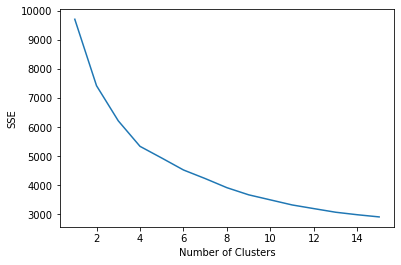

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster

numClusters = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(df_scale)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [10]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=5, max_iter=50, random_state=42)
k_means.fit(df_scale) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [11]:
#Returns cluster name for each row
k_means.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0,
       0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0,
       0, 0, 0, 2, 2, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       3, 3, 0, 0, 3, 3, 4, 3, 3, 4, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 4, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 4, 4, 0, 4, 0, 4, 4,
       0, 4, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0,
       4, 0, 0, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [12]:
dfCenters = pd.DataFrame(data=k_means.cluster_centers_, columns=[df_clus.columns])
ClusterName = ['C1', 'C2', 'C3', 'C4', 'C5'] 
  
dfCenters['ClusterName'] = ClusterName
print(dfCenters)

  morning_peak_volume afternoon_peak_volume EARLY_MORNING_RIDER MIDDAY_RIDER  \
0            0.460355             -0.167631            0.550097     0.246749   
1           -2.024194              1.065108           -0.053050     1.183075   
2            0.807452              1.338132            0.742554     1.355562   
3           -0.661660             -0.327628           -0.912314    -0.524218   
4           -0.317613             -0.412182           -0.413445    -0.733942   

  MORNING_MAX morning_ratio afternoon_max afternoon_ratio     ratio  \
0    0.531117      0.248493      0.081513       -0.356313  0.177047   
1   -0.733567     -2.054371      1.526096        1.891369 -1.412433   
2    0.751494     -1.234220      1.516849        1.115628 -1.064864   
3   -0.899551     -0.548815     -0.215339        0.643490 -0.686882   
4   -0.345954      0.839048     -0.846655       -0.710825  0.843479   

  EARLY_MORNING_RATIO  ... AFTERNOON_PEAK_TRANSFER_RATIO morning_time1  \
0            0.295

In [13]:
#Attaching cluster names to the OG data frame
dp = pd.DataFrame(pd.np.column_stack([df, k_means.labels_]))
dp.columns = ['SUBWAY_STA', 'Borough', 'Sector', 'AREACODE', 'Segment', 'Station',
       'Line', 'morning_peak_volume', 'afternoon_peak_volume',
       'EARLY_MORNING_RIDER', 'MIDDAY_RIDER', 'MORNING_MAX', 'morning_ratio',
       'afternoon_max', 'afternoon_ratio', 'ratio', 'EARLY_MORNING_RATIO',
       'EARLY_MORNING_RATIO_MAX', 'MIDDAY_RATIO', 'MIDDAY_RATIO_MAX',
       'MORNING_PEAK_TRANSFER_RATIO', 'AFTERNOON_PEAK_TRANSFER_RATIO',
       'morning_time1', 'afternoon_time1', 'MORNING_DURATION',
       'AFTERNOON_DURATION', 'MONRING_DUMMY', 'EARLY_MORNING_TRANSFER_RATIO',
       'MIDDAY_TRANSFER_RATIO', 'Total_riders','ClusterNumber']

dp.loc[dp['ClusterNumber'] == 0, 'ClusterName'] = 'C1' 
dp.loc[dp['ClusterNumber'] == 1, 'ClusterName'] = 'C2'
dp.loc[dp['ClusterNumber'] == 2, 'ClusterName'] = 'C3' 
dp.loc[dp['ClusterNumber'] == 3, 'ClusterName'] = 'C4'
dp.loc[dp['ClusterNumber'] == 4, 'ClusterName'] = 'C5'

dp

,SUBWAY_STA,Borough,Sector,AREACODE,Segment,Station,Line,morning_peak_volume,afternoon_peak_volume,EARLY_MORNING_RIDER,...,morning_time1,afternoon_time1,MORNING_DURATION,AFTERNOON_DURATION,MONRING_DUMMY,EARLY_MORNING_TRANSFER_RATIO,MIDDAY_TRANSFER_RATIO,Total_riders,ClusterNumber,ClusterName
0,229,Manhattan,Midtown,1,Manhattan CBD Transfer,"Times Sq-42 St (N,Q,R,S,W,1,2,3,7)/42 St (A,C,E)",Manhattan CBD Transfer,117.184,29277,3.43924,...,8.1,17.4,1,1.5,1,0.111144,0.148807,5.2387,2,C3
1,231,Manhattan,Midtown,1,Manhattan CBD Transfer,"Grand Central-42 St (S,4,5,6,7)",Manhattan CBD Transfer,106.846,24838,3.08914,...,7.9,17,1,1,1,0.144629,0.134855,5.15544,2,C3
2,228,Manhattan,Midtown,1,Manhattan CBD Transfer,"34 St-Herald Square (B,D,F,N,Q,R,V,W)",Manhattan CBD Transfer,88.6792,26106,2.97004,...,8.1,17.1,1,1.5,1,0.179542,0.136027,5.06789,2,C3
3,227,Manhattan,Valley,1,Manhattan CBD Transfer,"14 St-Union Square (L,N,Q,R,W,4,5,6)",Manhattan CBD Transfer,73.0274,17079,2.93759,...,8.3,17,1,1.5,1,0.458183,0.25726,4.98838,2,C3
4,16,Manhattan,Midtown,1,Broadway/7 Av (CBD),"34 St-Penn Station (1,2,3)","Broadway/7 Av Line (CBD) (1,2,3)",116.55,11928,3.25449,...,8,17,1,1.5,1,0.120871,0.134445,4.94301,2,C3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,457,Brooklyn,Other Brooklyn,6,Canarsie,New Lots Av (L),Canarsie Line (L),25.632,325.5,1.86034,...,7.2,16.6,1,1.5,1,0.622995,0.494358,3.48202,0,C1
418,437,Brooklyn,Other Brooklyn,6,Jamaica,Alabama Av (J),"Jamaica Line (J,M,Z)",22.7156,362,1.781,...,7.7,16.4,2,2,1,0.868475,0.735685,3.37785,0,C1
419,279,Brooklyn,Other Brooklyn,6,Sea Beach,86 St (N),Sea Beach Line (N),20.5183,179,1.61856,...,7.2,15,1,1,1,0.423864,0.569023,3.34694,0,C1
420,331,Brooklyn,Other Brooklyn,6,Culver,Avenue U (F),"Culver Line (F,G)",20.0749,220.5,1.73239,...,7.5,16.6,1,1.5,1,0.53171,0.492756,3.34616,0,C1


In [14]:
#reverse transform
columns = ['morning_peak_volume',
       'MORNING_PEAK_TRANSFER_RATIO', 'AFTERNOON_PEAK_TRANSFER_RATIO',
       'EARLY_MORNING_TRANSFER_RATIO',
       'MIDDAY_TRANSFER_RATIO']

for column in columns:
    dp[column] = np.square(dp[column])

In [15]:
#reverse transform

logs = ['EARLY_MORNING_RIDER', 'MIDDAY_RIDER', 'MORNING_MAX', 'afternoon_max', 'afternoon_ratio',
       'Total_riders']

for column in logs:
    dp[column] = 10**(dp[column]) 

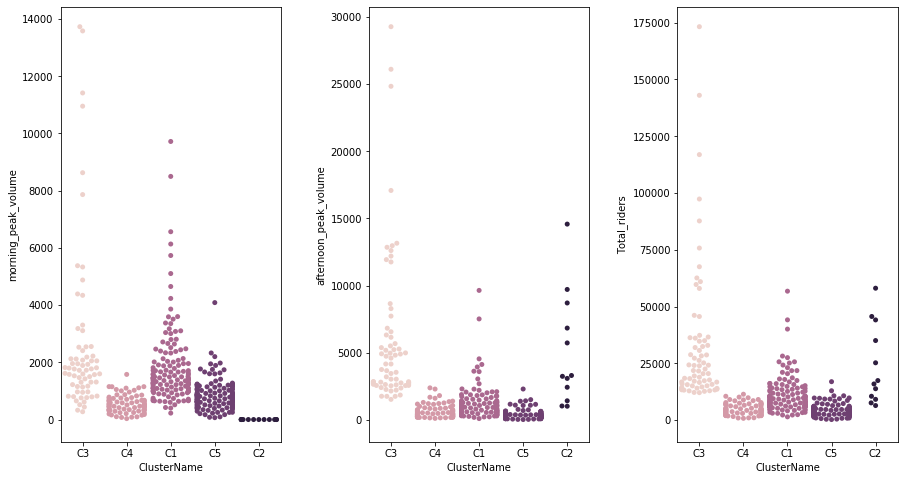

In [13]:
import seaborn as sns
fig, ax = plt.subplots(ncols=3)
fig.set_figheight(8)
fig.set_figwidth(15)
plt.subplots_adjust(wspace = .4)
pal = sns.cubehelix_palette(5)

sns.swarmplot(data=dp, x = 'ClusterName', y = 'morning_peak_volume', palette = pal, ax=ax[0])
sns.swarmplot(data=dp, x = 'ClusterName', y = 'afternoon_peak_volume', palette = pal, ax=ax[1])
sns.swarmplot(data=dp, x = 'ClusterName', y = 'Total_riders', palette = pal, ax = ax[2])

plt.savefig('cluster_swarmplots')

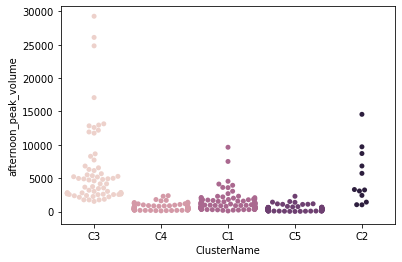

In [14]:
sns.swarmplot(data=dp, x = 'ClusterName', y = 'afternoon_peak_volume', palette = pal)

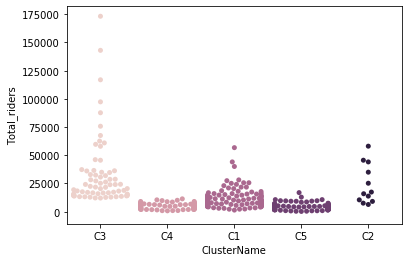

In [15]:
sns.swarmplot(data=dp, x = 'ClusterName', y = 'Total_riders', palette = pal)

In [16]:
dp[['morning_peak_volume', 'afternoon_peak_volume',
       'EARLY_MORNING_RIDER', 'MIDDAY_RIDER', 'MORNING_MAX', 'morning_ratio',
       'afternoon_max', 'afternoon_ratio', 'ratio', 'EARLY_MORNING_RATIO',
       'EARLY_MORNING_RATIO_MAX', 'MIDDAY_RATIO', 'MIDDAY_RATIO_MAX',
       'MORNING_PEAK_TRANSFER_RATIO', 'AFTERNOON_PEAK_TRANSFER_RATIO',
       'morning_time1', 'afternoon_time1', 'MORNING_DURATION',
       'AFTERNOON_DURATION', 'MONRING_DUMMY', 'EARLY_MORNING_TRANSFER_RATIO',
       'MIDDAY_TRANSFER_RATIO', 'Total_riders', 'ClusterNumber']] = dp[['morning_peak_volume', 'afternoon_peak_volume',
       'EARLY_MORNING_RIDER', 'MIDDAY_RIDER', 'MORNING_MAX', 'morning_ratio',
       'afternoon_max', 'afternoon_ratio', 'ratio', 'EARLY_MORNING_RATIO',
       'EARLY_MORNING_RATIO_MAX', 'MIDDAY_RATIO', 'MIDDAY_RATIO_MAX',
       'MORNING_PEAK_TRANSFER_RATIO', 'AFTERNOON_PEAK_TRANSFER_RATIO',
       'morning_time1', 'afternoon_time1', 'MORNING_DURATION',
       'AFTERNOON_DURATION', 'MONRING_DUMMY', 'EARLY_MORNING_TRANSFER_RATIO',
       'MIDDAY_TRANSFER_RATIO', 'Total_riders', 'ClusterNumber']].apply(pd.to_numeric)

In [17]:
#Look at this one for Stat results
heat = dp.iloc[:,7:30].groupby(dp['ClusterNumber']).mean()
heat.head()

,morning_peak_volume,afternoon_peak_volume,EARLY_MORNING_RIDER,MIDDAY_RIDER,MORNING_MAX,morning_ratio,afternoon_max,afternoon_ratio,ratio,EARLY_MORNING_RATIO,...,MORNING_PEAK_TRANSFER_RATIO,AFTERNOON_PEAK_TRANSFER_RATIO,morning_time1,afternoon_time1,MORNING_DURATION,AFTERNOON_DURATION,MONRING_DUMMY,EARLY_MORNING_TRANSFER_RATIO,MIDDAY_TRANSFER_RATIO,Total_riders
ClusterNumber,,,,,,,,,,,,,,,,,,,,,
0,1860.089552,1157.902985,253.014467,581.175345,1802.059701,0.167524,714.746269,0.067736,2.744884,0.559812,...,0.166234,0.157329,7.504478,15.788806,1.033582,1.563433,1,0.239323,0.167204,10949.000000
1,0.000000,5085.583333,164.230556,1461.397950,625.083333,0.028934,4691.000000,0.181493,0.177423,0.173322,...,0.024702,0.009718,10.000000,16.858333,0.000000,1.125000,0,0.046057,0.015657,24061.000000
2,2656.858209,5955.477612,349.021003,1783.532995,2637.074627,0.078292,4469.507463,0.131561,0.738846,0.241391,...,0.049869,0.031384,8.162687,16.825373,1.022388,1.455224,1,0.078418,0.038462,33547.089552
3,551.746575,648.130137,74.010639,265.926422,540.630137,0.119541,530.726027,0.109261,1.349393,0.396483,...,0.048998,0.036675,7.720548,16.364384,1.027397,1.239726,1,0.073991,0.038479,4802.383562
4,858.161765,378.731618,109.860688,221.528530,830.176471,0.203065,241.426471,0.057707,3.821361,0.656283,...,0.026892,0.034141,7.418382,15.645588,1.029412,1.573529,1,0.033091,0.029572,4215.830882


In [18]:
from sklearn import preprocessing

#Scaling the means from 1 to 0
min_max_scaler = preprocessing.MinMaxScaler()
heat = min_max_scaler.fit_transform(heat)

heat = pd.DataFrame(data = heat, columns = ['morning_peak_volume', 'afternoon_peak_volume', 'EARLY_MORNING_RIDER',
       'MIDDAY_RIDER', 'MORNING_MAX', 'morning_ratio', 'afternoon_max',
       'afternoon_ratio', 'ratio', 'EARLY_MORNING_RATIO',
       'EARLY_MORNING_RATIO_MAX', 'MIDDAY_RATIO', 'MIDDAY_RATIO_MAX',
       'MORNING_PEAK_TRANSFER_RATIO', 'AFTERNOON_PEAK_TRANSFER_RATIO',
       'morning_time1', 'afternoon_time1', 'MORNING_DURATION',
       'AFTERNOON_DURATION', 'MONRING_DUMMY', 'EARLY_MORNING_TRANSFER_RATIO',
       'MIDDAY_TRANSFER_RATIO', 'Total_riders'])

heat.head()

,morning_peak_volume,afternoon_peak_volume,EARLY_MORNING_RIDER,MIDDAY_RIDER,MORNING_MAX,morning_ratio,afternoon_max,afternoon_ratio,ratio,EARLY_MORNING_RATIO,...,MORNING_PEAK_TRANSFER_RATIO,AFTERNOON_PEAK_TRANSFER_RATIO,morning_time1,afternoon_time1,MORNING_DURATION,AFTERNOON_DURATION,MONRING_DUMMY,EARLY_MORNING_TRANSFER_RATIO,MIDDAY_TRANSFER_RATIO,Total_riders
0,0.700109,0.139718,0.650898,0.230247,0.601699,0.795897,0.106374,0.081021,0.704584,0.800252,...,1.000000,1.000000,0.033349,0.118094,1.000000,0.977490,1.0,1.000000,1.000000,0.229556
1,0.000000,0.844014,0.328060,0.793768,0.040284,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.062872,0.000000,0.676588
2,1.000000,1.000000,1.000000,1.000000,1.000000,0.283454,0.950222,0.596620,0.154070,0.140941,...,0.177818,0.146775,0.288309,0.972822,0.989170,0.736237,1.0,0.219790,0.150485,1.000000
3,0.207669,0.048307,0.000000,0.028424,0.000000,0.520338,0.065017,0.416475,0.321622,0.462068,...,0.171665,0.182618,0.117045,0.592701,0.994016,0.255783,1.0,0.198320,0.150594,0.019998
4,0.322999,0.000000,0.130359,0.000000,0.138113,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.015471,0.165452,0.000000,0.000000,0.995965,1.000000,1.0,0.000000,0.091819,0.000000


In [19]:
heat.columns

Index(['morning_peak_volume', 'afternoon_peak_volume', 'EARLY_MORNING_RIDER',
       'MIDDAY_RIDER', 'MORNING_MAX', 'morning_ratio', 'afternoon_max',
       'afternoon_ratio', 'ratio', 'EARLY_MORNING_RATIO',
       'EARLY_MORNING_RATIO_MAX', 'MIDDAY_RATIO', 'MIDDAY_RATIO_MAX',
       'MORNING_PEAK_TRANSFER_RATIO', 'AFTERNOON_PEAK_TRANSFER_RATIO',
       'morning_time1', 'afternoon_time1', 'MORNING_DURATION',
       'AFTERNOON_DURATION', 'MONRING_DUMMY', 'EARLY_MORNING_TRANSFER_RATIO',
       'MIDDAY_TRANSFER_RATIO', 'Total_riders'],
      dtype='object')

In [20]:
heat_org = heat[['Total_riders','ratio',
                 'EARLY_MORNING_RIDER','EARLY_MORNING_RATIO','EARLY_MORNING_RATIO_MAX',
                 'morning_peak_volume','MORNING_MAX','morning_ratio','MONRING_DUMMY',
                 'MIDDAY_RIDER','MIDDAY_RATIO', 'MIDDAY_RATIO_MAX',
                 'afternoon_peak_volume','afternoon_max','afternoon_ratio',
                'EARLY_MORNING_TRANSFER_RATIO','MORNING_PEAK_TRANSFER_RATIO','MIDDAY_TRANSFER_RATIO','AFTERNOON_PEAK_TRANSFER_RATIO',
                'morning_time1', 'afternoon_time1', 'MORNING_DURATION','AFTERNOON_DURATION',]]

heat_org.head()

,Total_riders,ratio,EARLY_MORNING_RIDER,EARLY_MORNING_RATIO,EARLY_MORNING_RATIO_MAX,morning_peak_volume,MORNING_MAX,morning_ratio,MONRING_DUMMY,MIDDAY_RIDER,...,afternoon_max,afternoon_ratio,EARLY_MORNING_TRANSFER_RATIO,MORNING_PEAK_TRANSFER_RATIO,MIDDAY_TRANSFER_RATIO,AFTERNOON_PEAK_TRANSFER_RATIO,morning_time1,afternoon_time1,MORNING_DURATION,AFTERNOON_DURATION
0,0.229556,0.704584,0.650898,0.800252,1.000000,0.700109,0.601699,0.795897,1.0,0.230247,...,0.106374,0.081021,1.000000,1.000000,1.000000,1.000000,0.033349,0.118094,1.000000,0.977490
1,0.676588,0.000000,0.328060,0.000000,0.000000,0.000000,0.040284,0.000000,0.0,0.793768,...,1.000000,1.000000,0.062872,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
2,1.000000,0.154070,1.000000,0.140941,0.315740,1.000000,1.000000,0.283454,1.0,1.000000,...,0.950222,0.596620,0.219790,0.177818,0.150485,0.146775,0.288309,0.972822,0.989170,0.736237
3,0.019998,0.321622,0.000000,0.462068,0.735099,0.207669,0.000000,0.520338,1.0,0.028424,...,0.065017,0.416475,0.198320,0.171665,0.150594,0.182618,0.117045,0.592701,0.994016,0.255783
4,0.000000,1.000000,0.130359,1.000000,0.946302,0.322999,0.138113,1.000000,1.0,0.000000,...,0.000000,0.000000,0.000000,0.015471,0.091819,0.165452,0.000000,0.000000,0.995965,1.000000


In [21]:
heat_trans = heat_org.transpose()

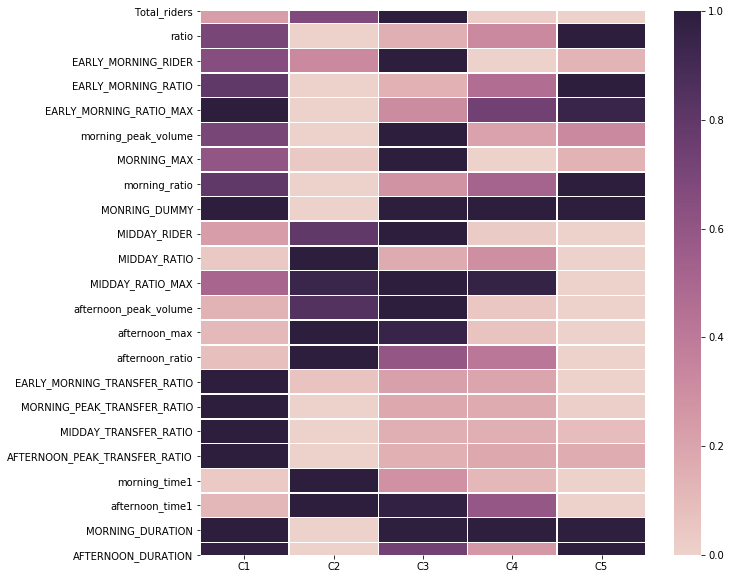

In [22]:
import matplotlib.pyplot as plt

#cmap = sns.color_palette("coolwarm", 10)

cmap = sns.cubehelix_palette(10, as_cmap=True)
labs = ['C1','C2','C3','C4','C5']

plt.figure(figsize = (10,10))
sns.heatmap(heat_trans, xticklabels = labs, cmap = cmap, linewidths = .5)

#Patterns: 1 - low volume, mornings 2 - afternoon peak, short duration, no morning peak 3 - transfers 
#4 - workhorses (high volume + duration, all hours of the day) 5- midday

In [23]:
#Number of stations in each Cluster
dp['ClusterName'].value_counts()

C5    136
C1    134
C4     73
C3     67
C2     12
Name: ClusterName, dtype: int64

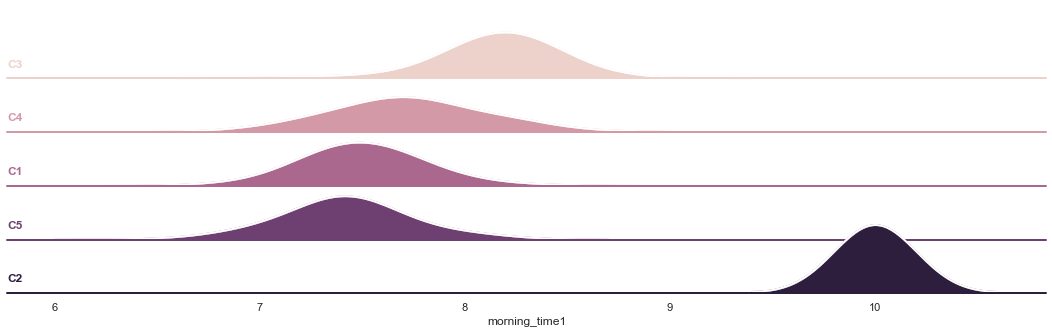

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
df = dp

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(5)
g = sns.FacetGrid(df, row='ClusterName', hue='ClusterName', aspect=15, height=1, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "morning_time1", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "morning_time1", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "morning_time1")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
#plt.savefig("afternoon_time")

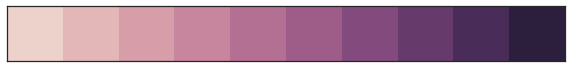

In [25]:
sns.palplot(sns.cubehelix_palette(10))

[Text(0, 0, 'Midtown'),
 Text(0, 0, 'Valley'),
 Text(0, 0, 'Downtown'),
 Text(0, 0, 'Upper Manhattan'),
 Text(0, 0, 'Brooklyn CBD'),
 Text(0, 0, 'Queens'),
 Text(0, 0, 'Other Brooklyn'),
 Text(0, 0, 'Bronx')]

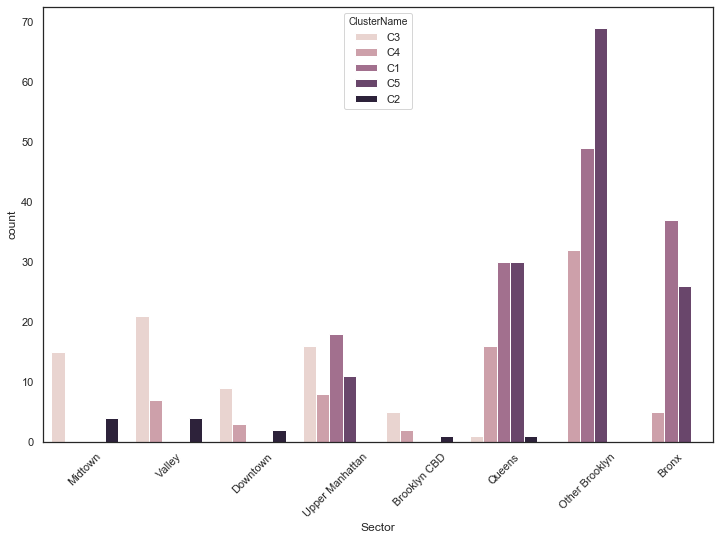

In [26]:
sns.set(style = 'white')
plt.figure(figsize = (12,8))

pal = sns.cubehelix_palette(5)

chart = sns.countplot(data=dp, x='Sector', hue='ClusterName', palette = pal)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
#plt.savefig("cluster_bar_plot")

In [27]:
dp.describe()

,morning_peak_volume,afternoon_peak_volume,EARLY_MORNING_RIDER,MIDDAY_RIDER,MORNING_MAX,morning_ratio,afternoon_max,afternoon_ratio,ratio,EARLY_MORNING_RATIO,...,AFTERNOON_PEAK_TRANSFER_RATIO,morning_time1,afternoon_time1,MORNING_DURATION,AFTERNOON_DURATION,MONRING_DUMMY,EARLY_MORNING_TRANSFER_RATIO,MIDDAY_TRANSFER_RATIO,Total_riders,ClusterNumber
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,...,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,1384.476303,1692.000000,188.632565,626.662301,1369.741706,0.152570,1239.578199,0.085055,2.458903,0.501103,...,0.072564,7.689573,16.037204,1.000000,1.481043,0.971564,0.113217,0.075832,11676.492891,2.154028
std,1642.039504,3189.922156,228.700750,875.086698,1600.205241,0.060253,2487.082208,0.044726,1.617201,0.198621,...,0.083862,0.550737,0.825292,0.209626,0.645372,0.166412,0.141146,0.090014,16943.724800,1.656333
min,0.000000,18.000000,8.734177,12.985075,33.000000,0.011346,15.000000,0.028832,0.031119,0.060421,...,0.000000,6.600000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,229.000000,0.000000
25%,604.500000,336.000000,78.581970,194.464535,601.500000,0.121422,238.000000,0.055469,1.315010,0.373970,...,0.010324,7.400000,15.000000,1.000000,1.000000,1.000000,0.015715,0.012938,3784.250000,0.000000
50%,979.500000,607.500000,131.155942,345.552585,956.000000,0.162950,453.500000,0.071015,2.314053,0.534868,...,0.040243,7.600000,16.350000,1.000000,1.500000,1.000000,0.067040,0.044391,6415.000000,2.000000
75%,1595.000000,1566.750000,210.886853,739.951748,1578.750000,0.196152,1096.750000,0.099570,3.518345,0.623666,...,0.103404,7.900000,16.700000,1.000000,1.500000,1.000000,0.149757,0.100462,13062.250000,4.000000
max,13732.000000,29277.000000,2749.382716,8474.337349,13732.000000,0.288210,24838.000000,0.364612,8.949367,1.342466,...,0.490110,10.000000,17.700000,2.000000,5.000000,1.000000,0.771752,0.582261,173260.000000,4.000000


In [28]:
dp.columns

Index(['SUBWAY_STA', 'Borough', 'Sector', 'AREACODE', 'Segment', 'Station',
       'Line', 'morning_peak_volume', 'afternoon_peak_volume',
       'EARLY_MORNING_RIDER', 'MIDDAY_RIDER', 'MORNING_MAX', 'morning_ratio',
       'afternoon_max', 'afternoon_ratio', 'ratio', 'EARLY_MORNING_RATIO',
       'EARLY_MORNING_RATIO_MAX', 'MIDDAY_RATIO', 'MIDDAY_RATIO_MAX',
       'MORNING_PEAK_TRANSFER_RATIO', 'AFTERNOON_PEAK_TRANSFER_RATIO',
       'morning_time1', 'afternoon_time1', 'MORNING_DURATION',
       'AFTERNOON_DURATION', 'MONRING_DUMMY', 'EARLY_MORNING_TRANSFER_RATIO',
       'MIDDAY_TRANSFER_RATIO', 'Total_riders', 'ClusterNumber',
       'ClusterName'],
      dtype='object')

In [57]:
#Querying
dp.loc[dp['ClusterName']=='C2','Sector'].unique()

array(['Midtown', 'Valley', 'Downtown', 'Queens', 'Brooklyn CBD'],
      dtype=object)

In [2]:
conda install -c conda-forge geocoder

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::r-sparklyr==1.0.0=r36h6115d3f_0
  - defaults/noarch::r-rsconnect==0.8.13=r36h6115d3f_0
  - defaults/noarch::r-r2d3==0.2.3=r36h6115d3f_0
done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.0
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |   py37hc8dfbb8_1         3.0 MB  conda-forge
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    r-rstudioapi-0.11   

In [19]:
import geocoder

url = 'http://localhost/nominatim/'

geo = geocoder.google(dp['Station'])


Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Times+Sq-42+St+%28N%2CQ%2CR%2CS%2CW%2C1%2C2%2C3%2C7%29%2F42+St+%28A%2CC%2CE%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x106377e90>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Grand+Central-42+St+%28S%2C4%2C5%2C6%2C7%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x10637bfd0>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=34+St-Herald+Sq

Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=23+St+%286%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1a1bf03f50>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=33+St+%286%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1a1a0f3cd0>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Midtown-57+St-7+Av+%28N%2CQ%2CR%2CW%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError(

Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=116+St-Columbia+University+%281%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x10638ee50>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Houston+St+%281%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x10639ba10>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=57+St+%28F%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('

Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=161+St-Yankee+Stadium+%28B%2CD%2C4%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x106367990>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=125+St+%284%2C5%2C6%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1a1c0abe10>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=96+St+%286%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectio

Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Broadway+%28N%2CW%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x10637bc10>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=125+St+%282%2C3%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x106377990>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Brighton+Beach+%28B%2CQ%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<

Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Mosholu+Pkwy+%284%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x10637b590>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Queensboro+Plaza+%28N%2CW%2C7%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1a1c1b13d0>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Queens+Plaza+%28E%2CG%2CR%2CV%29&format=jsonv2&addressdetails=1&limit=1 (Caused by 

Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Cathedral+Pkwy-110+St+%28B%2CC%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1a1c1a4410>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Bedford+Park+Blvd-Lehman+College+%284%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1063a4850>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Prospect+Av+%282%2C5%29&format=jsonv2&addressdetails=1&limit=1

Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Nostrand+Av+%283%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x10638e9d0>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=18+Av+%28F%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1a1c187350>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=135+St+%28B%2CC%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.conne

Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Flushing+Av+%28G%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x10637b050>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=55+St+%28D%2CM%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1a1c18d9d0>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Hewes+St+%28J%2CM%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3

Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Canal+St+%281%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1063b1210>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Junction+Blvd+%287%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1a1c1b1cd0>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=90+St-Elmhurst+Av+%287%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<u

Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Bergen+St+%28F%2CG%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x106377790>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=DeKalb+Av+%28L%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1a1c1993d0>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Carroll+St+%28F%2CG%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<url

Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Hunters+Point+Av+%287%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1a1c1b1650>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Elder+Av+%286%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x10638ed90>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=170+St+%28B%2CD%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urlli

Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Bay+Pkwy+%28N%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1a1c0d1050>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Kingston+Av+%283%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x106377e10>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Montrose+Av+%28L%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.c

Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Beverly+Rd+%282%2C5%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1063777d0>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=190+St+%28A%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1a1c18dc10>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Burke+Av+%282%2C5%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3

Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=163+St-Amsterdam+Av+%28C%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x106377650>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Avenue+N+%28F%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1063ac190>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Forest+Av+%28M%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urll

Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Freeman+St+%282%2C5%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1a1c1b2650>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Avenue+H+%28Q%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1a1c187b10>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Shepherd+Av+%28C%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urlli

Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Beach+25+St+%28A%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x106377bd0>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Morris+Park+%285%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1a1c187f10>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Whitlock+Av+%286%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib

Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Woodhaven+Blvd+%28G%2CR%2CV%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1063677d0>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Brooklyn+College-Flatbush+Av+%282%2C5%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x10639be10>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Sutphin+Blvd-Archer+Av-JFK+Airport+%28E%2CJ%2CZ%29&format=jsonv2&a

Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Northern+Blvd+%28G%2CR%2CV%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x10639b810>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Simpson+St+%282%2C5%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1a1c1b1ed0>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Avenue+U+%28Q%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionErro

Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=New+Lots+Av+%28L%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x10638ed50>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=Alabama+Av+%28J%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1062edf90>: Failed to establish a new connection: [Errno 61] Connection refused'))
Status code Unknown from http://localhost/nominatim/: ERROR - HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /nominatim/?q=86+St+%28N%29&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connec